In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data cleaning

In [2]:
# Import data
crypto = pd.read_csv("resources\crypto_data.csv")
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Check shape
crypto.shape

(1252, 7)

In [4]:
# Keep only 'IsTrading'
crypto_trade = crypto.loc[crypto['IsTrading']==True]
crypto_trade.shape

(1144, 7)

In [5]:
# Drop IsTrading column
crypto_trade = crypto_trade.drop(labels='IsTrading', axis=1)
crypto_trade.shape

(1144, 6)

In [6]:
# Drop any NaN
crypto_trade = crypto_trade.dropna(how="any")
crypto_trade.shape

(685, 6)

In [7]:
# Ensure only mined coins are included
crypto_mined = crypto_trade.loc[crypto['TotalCoinsMined']>0]
crypto_mined.shape

(532, 6)

In [8]:
# Drop un-useful column CoinName
crypto_mined = crypto_mined.drop(labels='CoinName', axis=1)
crypto_mined.shape

(532, 5)

In [9]:
# Drop unnecessary column 0
crypto_mined = crypto_mined.drop(labels='Unnamed: 0', axis=1)
crypto_mined.shape

(532, 4)

In [10]:
# Check dtypes
crypto_mined.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [11]:
# Correct dtype
crypto_mined.astype({'TotalCoinSupply': 'float'}).dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [12]:
# Convert to categorical
# Columns need to be specified because of issued with TotalCoinSupply
crypto_dummies = pd.DataFrame()
crypto_dummies = pd.get_dummies(data=crypto_mined, columns=['Algorithm', 'ProofType'])
crypto_dummies.shape

(532, 98)

In [13]:
crypto_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Set TotalCoinSupply to float again
crypto_dummies.astype({'TotalCoinSupply': 'float'}).dtypes

TotalCoinsMined                     float64
TotalCoinSupply                     float64
Algorithm_1GB AES Pattern Search      uint8
Algorithm_536                         uint8
Algorithm_Argon2d                     uint8
                                     ...   
ProofType_Proof of Authority          uint8
ProofType_Proof of Trust              uint8
ProofType_TPoS                        uint8
ProofType_Zero-Knowledge Proof        uint8
ProofType_dPoW/PoW                    uint8
Length: 98, dtype: object

# Dimensionality reduction

In [15]:
# Scale data
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_dummies)
print(crypto_scaled.shape)

(532, 98)


In [16]:
# PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)
print(sum(pca.explained_variance_ratio_))
crypto_pca.shape

0.9010870638268432


(532, 74)

In [17]:
# TSNE
# PCA still has 74 features, which is more than the recommended for TSNE

C:\Users\mail\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mail\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\mail\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mail\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\mail\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mail\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarnin

<function matplotlib.pyplot.show(close=None, block=None)>

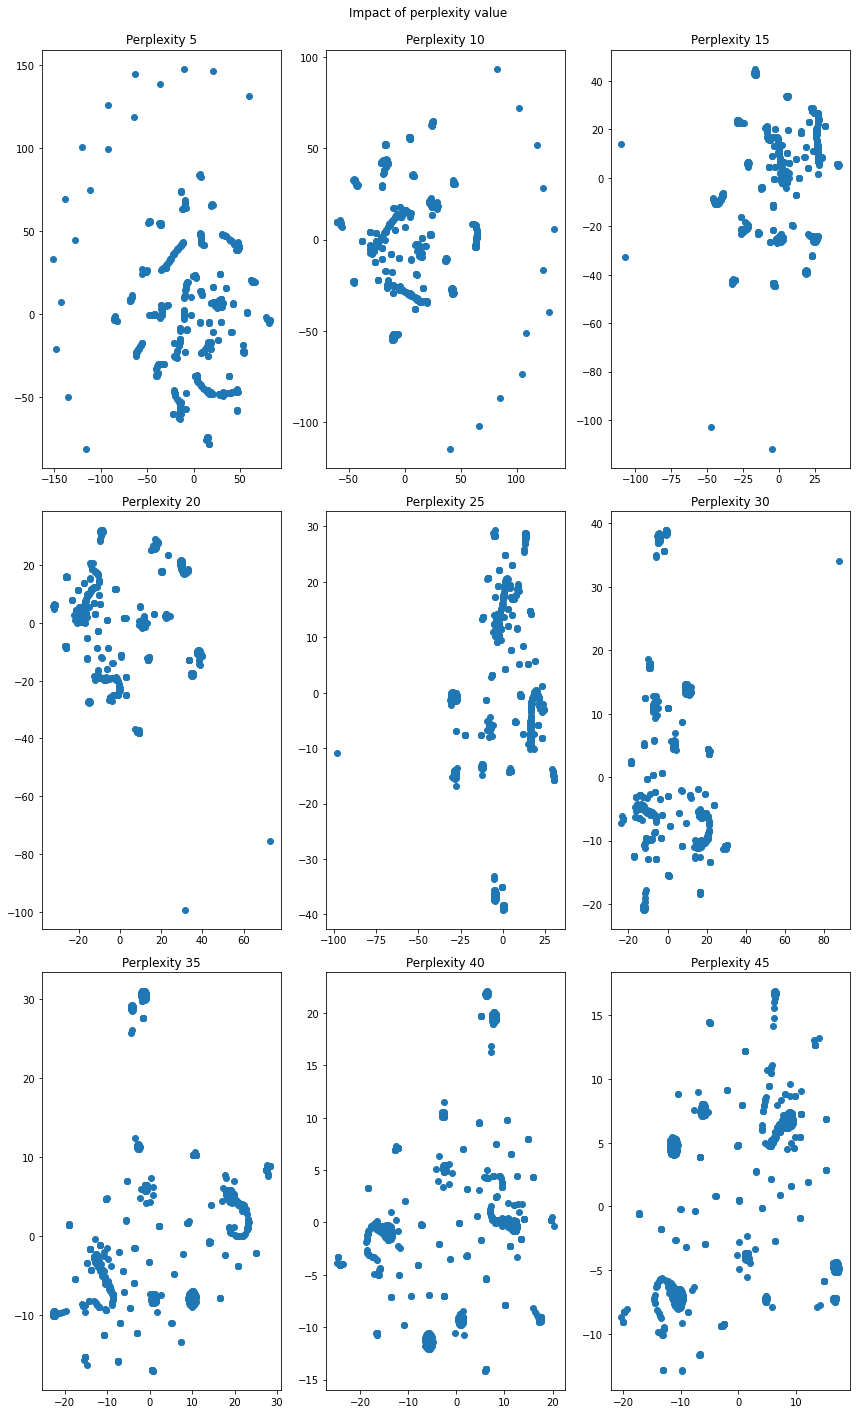

In [18]:
fig, ax = plt.subplots(3,3,figsize=(12,20))
fig.suptitle("Impact of perplexity value")

perplex = [5,10,15,20,25,30,35,40,45]

for plot in range (len(perplex)):
    row = int(plot/3)
    col = plot % 3

    tsne = TSNE(n_components=2, perplexity=perplex[plot])
    crypto_tsne = tsne.fit_transform(crypto_pca)
    
    ax[row, col].scatter(x=crypto_tsne[:,0], y=crypto_tsne[:,1])
    plot_title = f"Perplexity {perplex[plot]}"
    ax[row, col].set_title(plot_title) 

fig.tight_layout() 
plt.subplots_adjust(top=0.95)
plt.show

# K-means

C:\Users\mail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


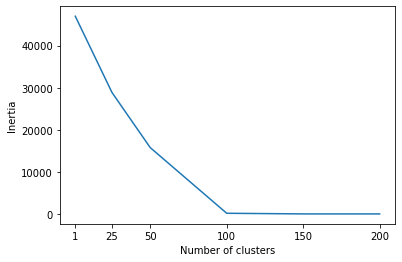

In [19]:
inertia = []
k_list = [1,25,50,100,150,200]
# Looking for the best k
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\mail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


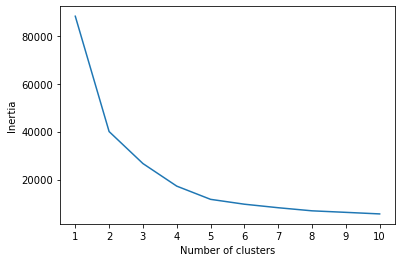

In [20]:
inertia = []
k_list = [1,2,3,4,5,6,7,8,9,10]
# Looking for the best k
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(crypto_tsne)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Summary results
With 10 clusters on the t-SNE data, intertia is still decreasing and at a high level. Applying k-means to the PCA data (i.e. without the additional T-SNE reduction) shows that 100 clusters are required before the elbow curve flattens out.

It can be concluded that this dataset cannot usefully be clustered by these methods